In [1]:
from picamera import PiCamera
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

#####################################################
# grab camera hardware and monitor
#####################################################
snapshot = np.empty((1024, 1280, 3), dtype=np.uint8)
box = (0, 1280, 0, 1024)


capturing...


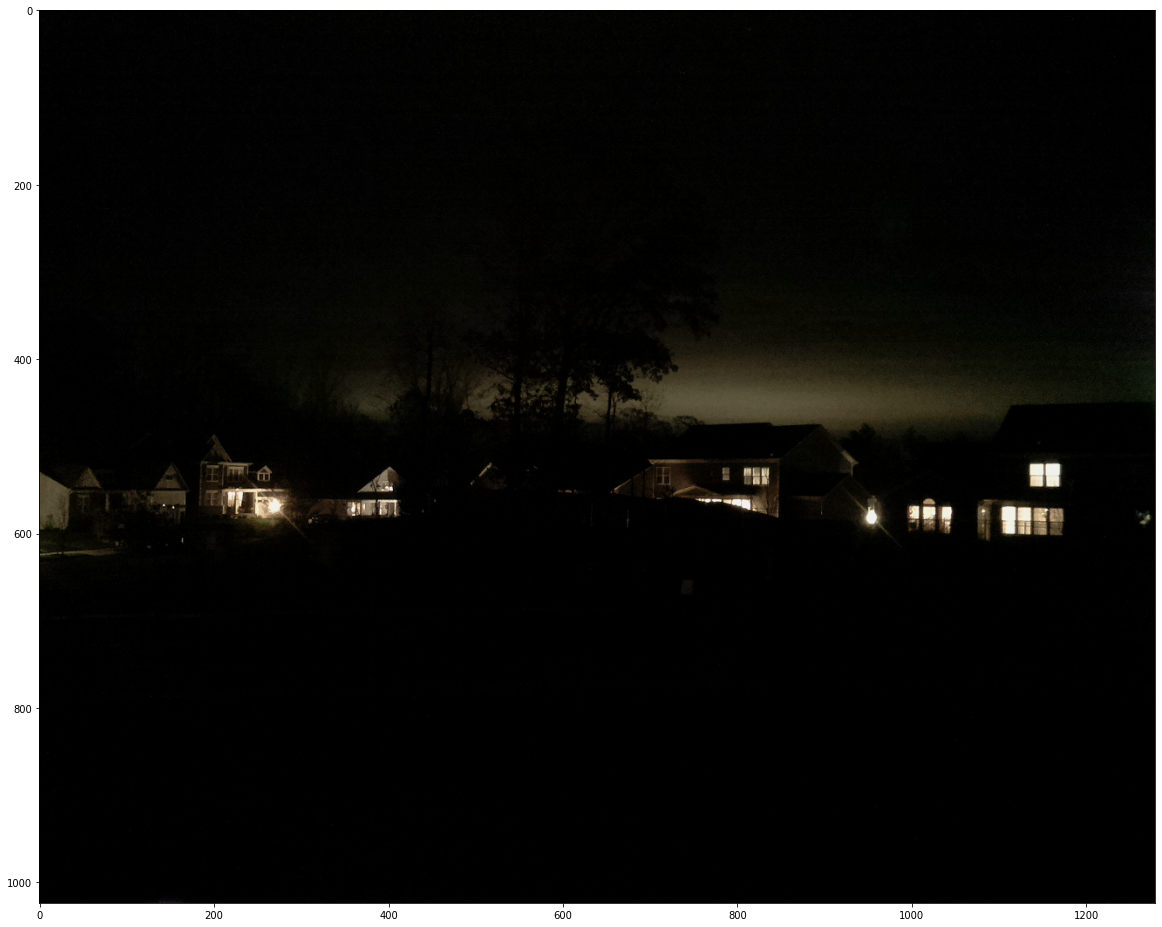

In [2]:
#with PiCamera(resolution=(1280, 1024)) as camera:
with PiCamera(resolution=(1280, 1024), framerate_range=(0.1, 30), sensor_mode=3) as camera:
    #camera.awb_mode='off'
    camera.iso = 800
    camera.exposure_mode = 'verylong'
    camera.shutter_speed = 6 * 1000 * 1000  # 1e-6 seconds
    time.sleep(2)
    camera.exposure_mode = 'off'
    print('capturing...')
    camera.capture(snapshot, 'rgb')
    cutout = snapshot[box[2]:box[3], box[0]:box[1]]
    camera.framerate = 1   # fix hang
    
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(cutout)

rc = cv2.imwrite('nightshot.jpg', cutout)
